# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [1]:
import networkx as nx

from model import VRP, create_constraints, output_variables
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt

In [2]:
# Test instance E-n22-k4 provided by parser
# G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")
# G = parse("Instances/E/E-n101-k14.vrp")
# G = parse("Instances/Uchoa/X-n101-k25.vrp")
# G.graph['min_trucks'] = 26
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
# G = parse("Instances/Uchoa/X-n120-k6.vrp")
# G.graph['min_trucks'] = 6
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
# G = parse("Instances/Uchoa/X-n256-k16.vrp")
# G.graph['min_trucks'] = 16
# G = parse("Instances/Uchoa/X-n289-k60.vrp")
# G.graph['min_trucks'] = 61
G = parse("Instances/Uchoa/X-n502-k39.vrp")
G.graph['min_trucks'] = 39 #TODO: Ist dieses K auch das K, einer Optimallösung?

PARSE: There is no minimum number of trucks.


In [3]:
model = VRP(G)

# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['methods'] = ["ng8"]
pricer.data['max_vars']= 1000
pricer.data['time_limit'] = 60

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G,heuristic_time=10)

model.optimize()
model.hideOutput(quiet=False)

HYGESE: Found Solution with value 69528.0
PRICER_PY: The maximal path length is 15
PY PRICING: The neighborhood has been fixed to 8 neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 540 variables (0 bin, 0 int, 0 impl, 540 cont) and 502 constraints
    502 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.4s|     1 |     0 |    78 |     - |    LP  |   0 | 540 | 502 | 502 |   0 |  0 |   0 |   0 |      --      | 6.952800e+04 |    Inf | unknown
  6.8s|     1 |     0 |    93 |     - |  8749k |   0 |1540 | 502 | 502 |   0 |  0 |   0 |   0 |      --      | 6.952800e+04 |    Inf | unknown
PR

[solve.c:4549] ERROR: pricing was aborted, but no branching could be created!
[solve.c:4984] ERROR: Error <-10> in function call
[scip_solve.c:2748] ERROR: Error <-10> in function call


Exception: SCIP: method returned an invalid result code!

1023.227847765345


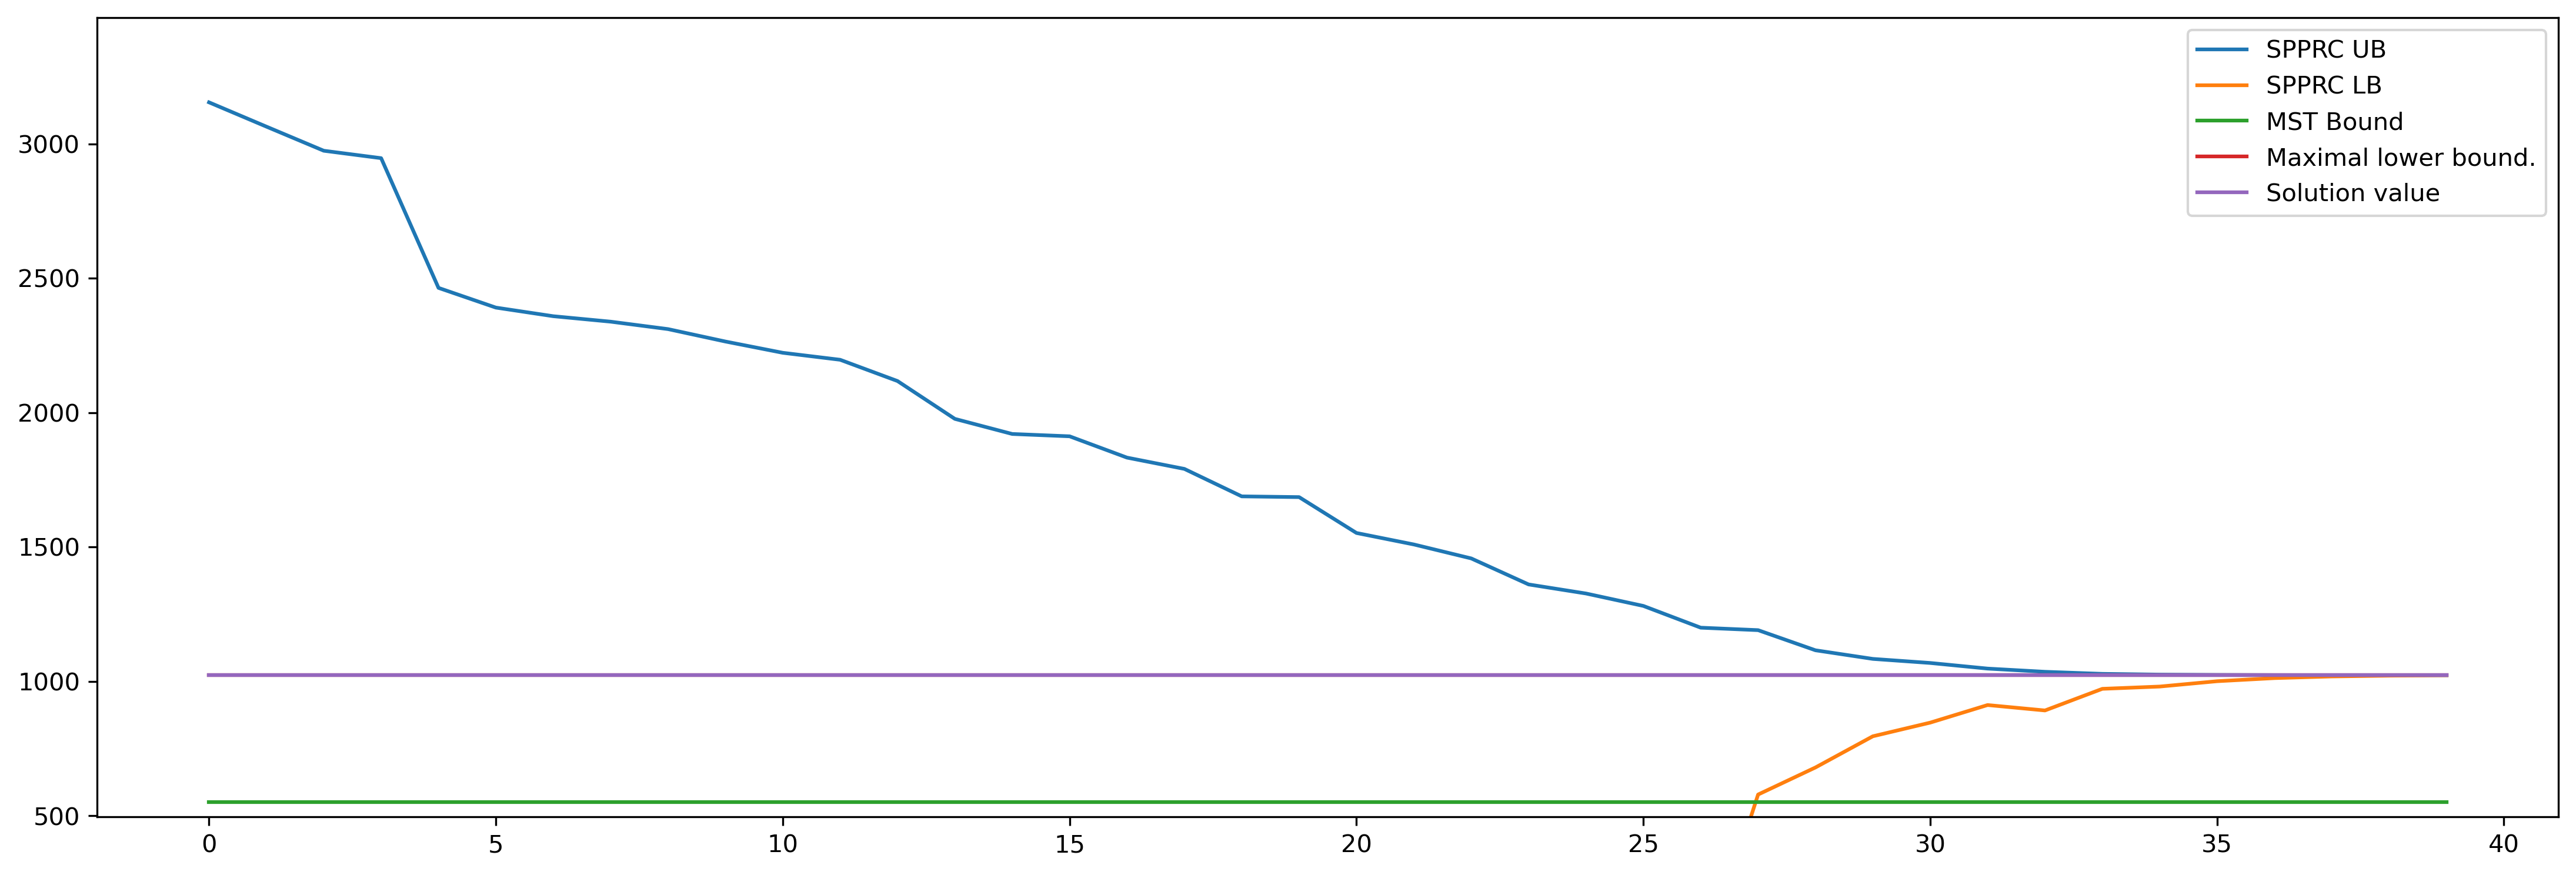

In [9]:
plt.figure(figsize=(18,6),dpi=300)
xmax, max_lb = 0, 0
for method in pricer.data['methods']:
    upper_bounds = [x for x,y in pricer.data['bounds'][method]]
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(upper_bounds, label=f'{method} UB')
    plt.plot(lower_bounds, label=f'{method} LB')
    xmax = max(upper_bounds[0],xmax)
    if max(lower_bounds) > upper_bounds[-1]:
        print(f"The maximum lower bound for {method} is larger than the final bound")
    max_lb = max(max(lower_bounds),max_lb)

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

max_lb = [max_lb for i in range(len(upper_bounds))]
plt.plot(max_lb, label="Maximal lower bound.")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Solution value")

plt.ylim((mst[0]*0.9,xmax*1.1))

print(max_lb[0])

plt.legend(loc='upper right')
# plt.savefig("plots/X-n502-k39.svg")
plt.show()

In [26]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
The following path is non elementary
0.10585415486187594 * x98347: (0, 433, 459, 172, 9, 270, 163, 268, 162, 163, 270, 9, 172, 459, 0)
The following path is non elementary
0.23305519261562416 * x112309: (0, 113, 476, 151, 482, 91, 479, 352, 91, 482, 151, 476, 113, 41, 0)
The following path is non elementary
0.25 * x113025: (0, 172, 146, 407, 218, 158, 374, 312, 363, 158, 218, 407, 146, 172, 0)
The following path is non elementary
0.06666666666666667 * x115822: (0, 498, 458, 331, 181, 286, 331, 181, 286, 331, 181, 458, 498, 216, 0)
The following path is non elementary
0.05730072725705795 * x117537: (0, 434, 19, 40, 472, 86, 109, 390, 319, 109, 86, 472, 123, 438, 0)
The following path is non elementary
0.0063573654384460054 * x118365: (0, 433, 459, 143, 190, 188, 279, 396, 224, 279, 188, 190, 143, 459, 0)
The following path is non elementary
0.2 * x118987: (0, 216, 498, 458, 286, 